# Capstone Project for the Data Science Specialization

### Rafael Y. Imai - April 2021

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime

Firstly, let's load the datasets with the investment funds CNPJ (similar to a company ID in Brazil, can be used to identify uniquely a given investment fund),the share value at a given date, along with the volume of subscriptions and redemptions in Brazilian Reais:

In [47]:
historicSeries = pd.DataFrame()
for year in range(2017,2021):
    for month in range(1,13):
        file = "CVMData/inf_diario_fi_{0}{1}.csv".format(year,str(month).zfill(2))
        historicSeries = historicSeries.append(pd.read_csv(file, sep = ";"))
    print("{} inserted.".format(year))

historicSeries=historicSeries[["CNPJ_FUNDO","DT_COMPTC","VL_TOTAL","VL_QUOTA","VL_PATRIM_LIQ","CAPTC_DIA","RESG_DIA","NR_COTST"]]


2017 inserted.
2018 inserted.
2019 inserted.
2020 inserted.


Also, let's load a dataset with all of the investment funds that have existed since the early 90's in Brazil. This file was also obtained from CVM.

In [48]:
fundList = pd.read_excel("cad_fi_filtered.xlsx") 
#fundList = fundList.fillna("2099-01-01 00:00:00")
fundList=fundList.rename(columns={'CNPJ_FUNDO':'CNPJ'})

In [49]:
historicSeries.describe()

,VL_TOTAL,VL_QUOTA,VL_PATRIM_LIQ,CAPTC_DIA,RESG_DIA,NR_COTST,CAP_LIQ,TKT_MED
count,1.539843e+07,1.539843e+07,1.539843e+07,1.539843e+07,1.539843e+07,1.539843e+07,1.539843e+07,1.534718e+07
mean,4.509613e+08,1.502239e+04,4.491871e+08,2.829099e+06,2.752343e+06,1.059561e+03,7.675540e+04,NaN
std,3.028144e+09,2.302718e+07,3.008135e+09,7.038041e+07,6.968411e+07,2.113526e+04,5.204656e+07,NaN
min,-8.804822e+08,-3.259389e+07,-8.833179e+07,0.000000e+00,0.000000e+00,0.000000e+00,-3.441170e+10,-inf
25%,1.678671e+07,1.390819e+00,1.678042e+07,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,2.798165e+06
50%,4.723933e+07,2.874078e+00,4.717449e+07,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,1.507260e+07
75%,1.713284e+08,2.861168e+01,1.708142e+08,0.000000e+00,0.000000e+00,1.300000e+01,0.000000e+00,5.741908e+07
max,3.439999e+12,9.033537e+10,3.439999e+12,4.281956e+10,4.230832e+10,5.300000e+07,3.585429e+10,inf


In [50]:
historicSeries = historicSeries[historicSeries["NR_COTST"]>0]
historicSeries.describe()

,VL_TOTAL,VL_QUOTA,VL_PATRIM_LIQ,CAPTC_DIA,RESG_DIA,NR_COTST,CAP_LIQ,TKT_MED
count,1.533344e+07,1.533344e+07,1.533344e+07,1.533344e+07,1.533344e+07,1.533344e+07,1.533344e+07,1.533344e+07
mean,4.528262e+08,8.980956e+03,4.510454e+08,2.840776e+06,2.748153e+06,1.064052e+03,9.262326e+04,1.669606e+08
std,3.034366e+09,5.421404e+05,3.014360e+09,7.052736e+07,6.935020e+07,2.117989e+04,5.150736e+07,1.477730e+09
min,-8.804822e+08,-3.259389e+07,-8.833179e+07,0.000000e+00,0.000000e+00,1.000000e+00,-3.441170e+10,-2.601959e+07
25%,1.698459e+07,1.398501e+00,1.697489e+07,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,2.791463e+06
50%,4.765799e+07,2.894943e+00,4.758310e+07,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,1.504495e+07
75%,1.725135e+08,2.892421e+01,1.719930e+08,0.000000e+00,0.000000e+00,1.300000e+01,0.000000e+00,5.714537e+07
max,3.439999e+12,1.130692e+08,3.439999e+12,4.281956e+10,4.230832e+10,5.300000e+07,3.585429e+10,3.439999e+12


In [51]:
historicSeries = historicSeries[historicSeries["VL_QUOTA"]!=0]
historicSeries.describe()

,VL_TOTAL,VL_QUOTA,VL_PATRIM_LIQ,CAPTC_DIA,RESG_DIA,NR_COTST,CAP_LIQ,TKT_MED
count,1.533244e+07,1.533244e+07,1.533244e+07,1.533244e+07,1.533244e+07,1.533244e+07,1.533244e+07,1.533244e+07
mean,4.528533e+08,8.981543e+03,4.510748e+08,2.840959e+06,2.748297e+06,1.064121e+03,9.266213e+04,1.669715e+08
std,3.034463e+09,5.421581e+05,3.014456e+09,7.052966e+07,6.935241e+07,2.118058e+04,5.150897e+07,1.477778e+09
min,-8.804822e+08,-3.259389e+07,-8.833179e+07,0.000000e+00,0.000000e+00,1.000000e+00,-3.441170e+10,-2.601959e+07
25%,1.698688e+07,1.398655e+00,1.697840e+07,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,2.793094e+06
50%,4.766365e+07,2.895402e+00,4.759011e+07,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,1.504678e+07
75%,1.725309e+08,2.893280e+01,1.720119e+08,0.000000e+00,0.000000e+00,1.300000e+01,0.000000e+00,5.715255e+07
max,3.439999e+12,1.130692e+08,3.439999e+12,4.281956e+10,4.230832e+10,5.300000e+07,3.585429e+10,3.439999e+12


In [52]:
#historicSeries[historicSeries["VL_PATRIM_LIQ"]==0].describe()

historicSeries = historicSeries[historicSeries["VL_PATRIM_LIQ"]!=0]
historicSeries.describe()

,VL_TOTAL,VL_QUOTA,VL_PATRIM_LIQ,CAPTC_DIA,RESG_DIA,NR_COTST,CAP_LIQ,TKT_MED
count,1.533200e+07,1.533200e+07,1.533200e+07,1.533200e+07,1.533200e+07,1.533200e+07,1.533200e+07,1.533200e+07
mean,4.528658e+08,8.981746e+03,4.510877e+08,2.841024e+06,2.747108e+06,1.064150e+03,9.391592e+04,1.669763e+08
std,3.034505e+09,5.421658e+05,3.014499e+09,7.053065e+07,6.932917e+07,2.118088e+04,5.147698e+07,1.477798e+09
min,-8.804822e+08,-3.259389e+07,-8.833179e+07,0.000000e+00,0.000000e+00,1.000000e+00,-3.441170e+10,-2.601959e+07
25%,1.698798e+07,1.398666e+00,1.697987e+07,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,2.793758e+06
50%,4.766703e+07,2.895476e+00,4.759373e+07,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,1.504764e+07
75%,1.725394e+08,2.893333e+01,1.720206e+08,0.000000e+00,0.000000e+00,1.300000e+01,0.000000e+00,5.715551e+07
max,3.439999e+12,1.130692e+08,3.439999e+12,4.281956e+10,4.230832e+10,5.300000e+07,3.585429e+10,3.439999e+12


In [53]:
historicSeries[historicSeries["VL_TOTAL"]<0]

,CNPJ_FUNDO,DT_COMPTC,VL_TOTAL,VL_QUOTA,VL_PATRIM_LIQ,CAPTC_DIA,RESG_DIA,NR_COTST,CAP_LIQ,TKT_MED
117530,11.809.507/0001-07,2017-01-16,-4369782.14,2.147792,16617127.59,0.0,0.00,193,0.00,8.609911e+04
117540,11.809.507/0001-07,2017-01-30,-563127.64,2.157631,14680442.40,50000.0,612632.14,169,-562632.14,8.686652e+04
179334,17.249.190/0001-88,2017-01-02,-2858.52,0.013737,-2433.15,0.0,0.00,2,0.00,-1.216575e+03
259948,23.546.489/0001-05,2017-01-20,-366216.89,0.957693,911683.46,0.0,0.00,3,0.00,3.038945e+05
259949,23.546.489/0001-05,2017-01-23,-485499.91,1.041854,991801.69,0.0,0.00,3,0.00,3.306006e+05
...,...,...,...,...,...,...,...,...,...,...
330690,33.521.794/0001-98,2020-12-07,-66165.77,1061.697188,11421466.53,0.0,0.00,1,0.00,1.142147e+07
330691,33.521.794/0001-98,2020-12-08,-206269.60,1058.051836,11382250.77,0.0,0.00,1,0.00,1.138225e+07
335653,34.027.731/0001-42,2020-12-10,-8308.94,-1.463045,-19928.90,0.0,0.00,1,0.00,-1.992890e+04
335660,34.027.731/0001-42,2020-12-21,-2666.66,-1.377582,-19190.21,0.0,0.00,1,0.00,-1.919021e+04


In [ ]:
historicSeries['CAP_LIQ']=historicSeries['CAPTC_DIA']-historicSeries['RESG_DIA']
historicSeries['TKT_MED']=historicSeries['VL_PATRIM_LIQ']/historicSeries['NR_COTST']

#### Another dataset that we will use is the historic series of the IBOVESPA index, the stock market index for the São Paulo Stock Exchange.

In [4]:
ibov = yf.Ticker('^BVSP')
ibovHistoric = ibov.history(start="2016-12-31",end="2021-1-1")
ibovHistoricClose = ibovHistoric[["Close"]] 
ibovHistoricClose = ibovHistoricClose.rename(columns={'Date':'DATE',"Close":"CLOSE"}) 

#### Random stuff about the SELIC rate

In [5]:
url = "SELIC.csv"
#url = "https://api.bcb.gov.br/dados/serie/bcdata.sgs.1178/dados?formato=json&dataInicial=01/01/2017&dataFinal=31/12/2020"
selicData = pd.read_csv(url,sep=";")
selicData["data"]=pd.to_datetime(selicData["data"], format='%d/%m/%Y')
selicData["valor"] = selicData["valor"].str.replace(",",".")
selicData["valor"]=(((pd.to_numeric(selicData["valor"])/100+1)**252)-1)*100
selicData = selicData.set_index("data") 

On the scope of this study, only common Investment Funds ("FI") will be considered. Every form of Investment Fund in Brazil is regulated by CVM, so funds that have a specific purpose (e.g., FUNCINE funds, special investment funds whose objective is to support the movie industry) and certain funds that are closed-end funds (such as FII - Fundos de Investimento Imobiliário or Real Estate Investment Funds, similar to REITs) will be discarded.



Also, in order to provide a consistent first sample, only funds that happened to exist between December 31, 2016 and today or existed in January 1, 2017 and were closed in 2021 were considered.

In [7]:
def mount_FirstLayer(lowerLimit,upperLimit):
    firstFundFilterLayer = fundList[fundList["TP_FUNDO"]=="FI"]
    firstFundFilterLayer = firstFundFilterLayer[firstFundFilterLayer["DT_REG"]<"2017-01-01"]
    firstFundFilterLayer = firstFundFilterLayer[(firstFundFilterLayer["SIT"]=="EM FUNCIONAMENTO NORMAL")]
    firstFundFilterLayer = firstFundFilterLayer.drop_duplicates(subset=['CNPJ'], keep='last')
    
    return firstFundFilterLayer

In [8]:
def mount_FinalLayers(firstFundFilterLayer):
    secondLayer = firstFundFilterLayer[firstFundFilterLayer["DENOM_SOCIAL"].str.contains("COTA")]
 
    fixedIncomeFundFilterLayer = secondLayer[secondLayer["CLASSE"].str.contains("Fundo de Renda Fixa")]
    #fixedIncomeFundFilterLayer[['CNPJ_FUNDO','DENOM_SOCIAL']]
 

    hedgeFundLayer = secondLayer[secondLayer["CLASSE"].str.contains("Fundo Multimercado")]
    
    #interbankRateFundFilterLayer = secondLayer[secondLayer["CLASSE"].str.contains("Fundo Referenciado")]
    
    return [fixedIncomeFundFilterLayer,hedgeFundLayer]

Afterwards, funds that use a master-feeder structure (a feeder fund that receive subscriptions and subscribes to a master fund, the fund that actually purchase securities and stock) will be filtered, considering only feeders (in portuguese, Fundos de Investimento em Cotas de Fundos de Investimentos).

In [9]:
def run_standard_analysis(historicSeries,fundList):
    
    dumpColumns = ['CNPJ','IbovCorrelation','SELICCorrelation','flowCorrelation','avgTicketCorrelation','vol']
    
    insightsFund = pd.DataFrame()
    insightsFund_SELIC = pd.DataFrame()
    insightsFund_Flow = pd.DataFrame()
    insightsFund_AvgTicket = pd.DataFrame()
    insightsFund_Dump = pd.DataFrame(columns=dumpColumns)

    dailyStatsHistoricSeries=historicSeries[historicSeries["CNPJ"].isin(fundList["CNPJ"])]
    dailyStatsHistoricSeries=dailyStatsHistoricSeries.rename(columns={"DT_COMPTC":"DATE"})
 
    for cnpj in fundList['CNPJ']:
        historicFundTemp = dailyStatsHistoricSeries[dailyStatsHistoricSeries['CNPJ']==cnpj]    
        historicFundTemp.set_index("DATE", inplace = True)  
        historicFundTemp = historicFundTemp.join(ibovHistoricClose)    
        historicFundTemp = historicFundTemp.dropna()
        historicFundTemp = historicFundTemp.join(selicData)
        
        
        
        stockCorrelation = [[cnpj,historicFundTemp[["NR_COTST","CLOSE"]].corr().iloc[1,0]]]
        SELICCorrelation = [[cnpj,historicFundTemp[["NR_COTST","valor"]].corr().iloc[1,0]]]
        flowCorrelation = [[cnpj,historicFundTemp[["NR_COTST","CAP_LIQ"]].corr().iloc[1,0]]]
        avgTicketCorrelation = [[cnpj,historicFundTemp[["NR_COTST","TKT_MED"]].corr().iloc[1,0]]]   
        vol = [[cnpj,historicFundTemp["VL_QUOTA"].std()/historicFundTemp["VL_QUOTA"].mean()]]
        
        insightsFund = insightsFund.append(stockCorrelation)   
        insightsFund_SELIC = insightsFund_SELIC.append(SELICCorrelation) 
        insightsFund_Flow = insightsFund_Flow.append(flowCorrelation) 
        insightsFund_AvgTicket = insightsFund_AvgTicket.append(avgTicketCorrelation) 
        insightsFund_Dump=insightsFund_Dump.append({'CNPJ':cnpj,'IbovCorrelation':stockCorrelation[0][1],'SELICCorrelation':SELICCorrelation[0][1],'flowCorrelation':flowCorrelation[0][1],'avgTicketCorrelation':avgTicketCorrelation[0][1],'vol':vol[0][1]},ignore_index=True)
        
    
    
    return [insightsFund, insightsFund_SELIC, insightsFund_Flow, insightsFund_AvgTicket, insightsFund_Dump]

In [10]:
def plot_graphs(insightsFund, insightsFund_SELIC, insightsFund_Flow, insightsFund_AvgTicket, binCount, main_Title):
    fig, axs = plt.subplots(1, 4, sharex=False, sharey=False)
    fig.set_size_inches(11,4)
    plt.suptitle(main_Title)

    axs[0].hist(insightsFund[[1]], bins=11)
    axs[0].set_title("shareholders vs stock market index")
    axs[0].set_xlabel("Correlations")
    axs[0].set_ylabel("# Funds")  


    axs[1].hist(insightsFund_SELIC[[1]], bins=11)
    axs[1].set_title("shareholders vs SELIC rates")
    axs[1].set_xlabel("Correlations")
    axs[1].set_ylabel("# Funds")  

    axs[2].hist(insightsFund_Flow[[1]], bins=11)
    axs[2].set_title("shareholders vs capital flow")
    axs[2].set_xlabel("Correlations")
    axs[2].set_ylabel("# Funds")  

    axs[3].hist(insightsFund_AvgTicket[[1]], bins=11)
    axs[3].set_title("shareholders vs avg ticket")
    axs[3].set_xlabel("Correlations")
    axs[3].set_ylabel("# Funds")      

    plt.tight_layout()
    
    plt.savefig("{}.png".format(main_Title))
    plt.show()

### hedgeFund

In [11]:
def hedgeFundAnalysis(startDate,endDate,hedgeFundLayer):
    hedgeFundHistoricSeries = historicSeries[historicSeries["CNPJ_FUNDO"].isin(hedgeFundLayer["CNPJ"])]
    hedgeFundHistoricSeries = hedgeFundHistoricSeries.rename(columns={'CNPJ_FUNDO':'CNPJ',"DT_COMPTC":"DATE"})
    
    hedgeFundHistoricSeries = hedgeFundHistoricSeries[(hedgeFundHistoricSeries['DATE']>=startDate)&(hedgeFundHistoricSeries['DATE']<=endDate)]
    
    results = run_standard_analysis(hedgeFundHistoricSeries,hedgeFundLayer)
    insightshedgeFund = results[0]
    insightshedgeFund_SELIC = results[1]
    insightshedgeFund_Flow = results[2]
    insightshedgeFund_AvgTicket = results[3]
    insightshedgeFund_Dump = results[4] 
    
    plot_graphs(insightshedgeFund, insightshedgeFund_SELIC, insightshedgeFund_Flow, insightshedgeFund_AvgTicket,11,"Hedge Funds Results {}-{}".format(startDate[:4],endDate[:4]))
    insightshedgeFund_Dump.to_csv("hedgeFund_dump_{}-{}.csv".format(startDate,endDate))
    print("Hedge Fund Data Shape")
    print(insightshedgeFund_Dump.shape)

#### Fixed Income Rate Funds

In [12]:
def fixedIncomeAnalysis(startDate,endDate,fixedIncomeFundFilterLayer):

    fixedIncomeHistoricSeries = historicSeries[historicSeries["CNPJ_FUNDO"].isin(fixedIncomeFundFilterLayer["CNPJ"])]
    fixedIncomeHistoricSeries = fixedIncomeHistoricSeries.rename(columns={'CNPJ_FUNDO':'CNPJ',"DT_COMPTC":"DATE"})
    
    fixedIncomeHistoricSeries = fixedIncomeHistoricSeries[(fixedIncomeHistoricSeries['DATE']>=startDate)&(fixedIncomeHistoricSeries['DATE']<=endDate)]

    results = run_standard_analysis(fixedIncomeHistoricSeries,fixedIncomeFundFilterLayer)
    insightsFixedIncome = results[0]
    insightsFI_SELIC = results[1]
    insightsFI_Flow = results[2]
    insightsFI_AvgTicket = results[3]
    insightsFI_Dump = results[4]

    plot_graphs(insightsFixedIncome, insightsFI_SELIC, insightsFI_Flow, insightsFI_AvgTicket,11,"Fixed Income Funds Results {}-{}".format(startDate[:4],endDate[:4]))
    insightsFI_Dump.to_csv("fixedIncome_dump_{}-{}.csv".format(startDate,endDate))
    print("Fixed Income Rate Shape")
    print(insightsFI_Dump.shape)

### Yearly analysis

In [13]:
def analyze(lowerLimit, upperLimit):
 
    firstFundFilterLayer = mount_FirstLayer(lowerLimit,upperLimit)
    filters = mount_FinalLayers(firstFundFilterLayer)
    fixedIncomeFundFilterLayer = filters[0]
    hedgeFundLayer = filters[1]
    #interbankRateFundFilterLayer = filters[2]
      
    hedgeFundAnalysis(lowerLimit,upperLimit,hedgeFundLayer)
    #interbankAnalysis(lowerLimit,upperLimit,interbankRateFundFilterLayer)
    fixedIncomeAnalysis(lowerLimit,upperLimit,fixedIncomeFundFilterLayer)
    #privateBondAnalysis(lowerLimit,upperLimit,privateBondsFundFilterLayer)

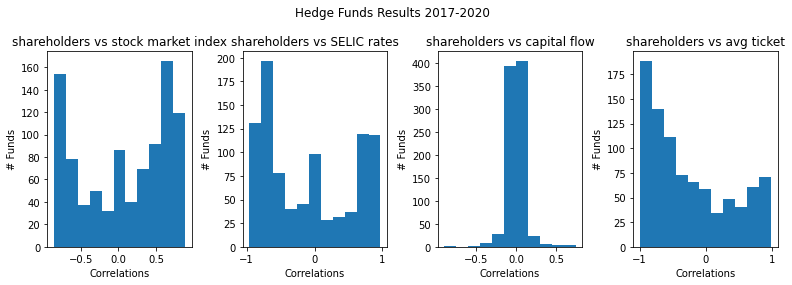

Hedge Fund Data Shape
(1537, 6)


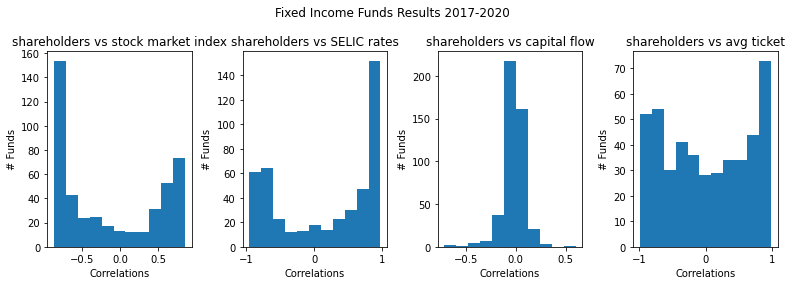

Fixed Income Rate Shape
(473, 6)


In [14]:
lowerLimit = "2017-01-01"
upperLimit = "2020-12-31"
analyze(lowerLimit, upperLimit)

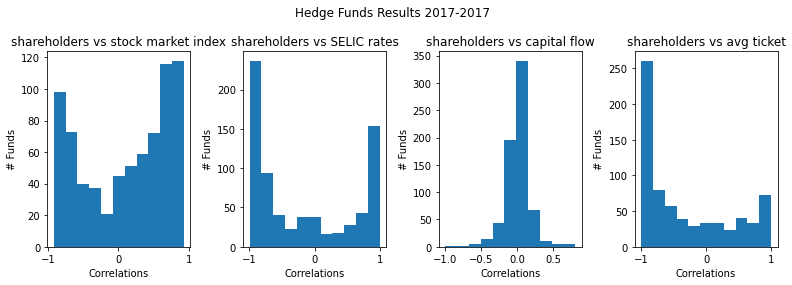

Hedge Fund Data Shape
(1537, 6)


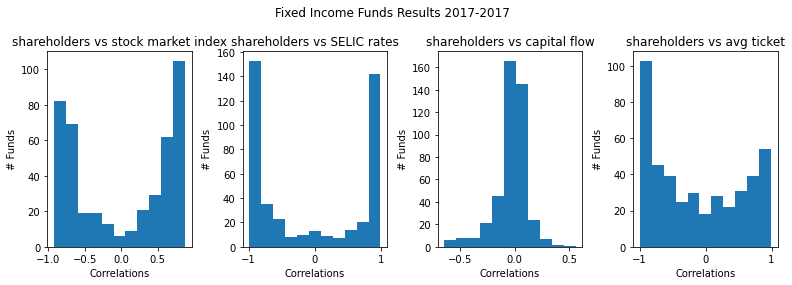

Fixed Income Rate Shape
(473, 6)


In [15]:
lowerLimit = "2017-01-01"
upperLimit = "2017-12-31"
analyze(lowerLimit, upperLimit)

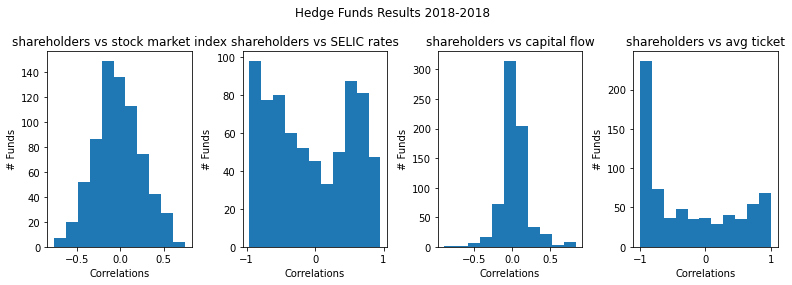

Hedge Fund Data Shape
(1537, 6)


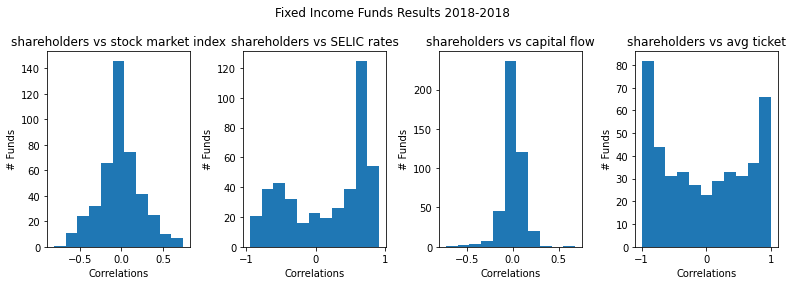

Fixed Income Rate Shape
(473, 6)


In [16]:
lowerLimit = "2018-01-01"
upperLimit = "2018-12-31"
analyze(lowerLimit, upperLimit)

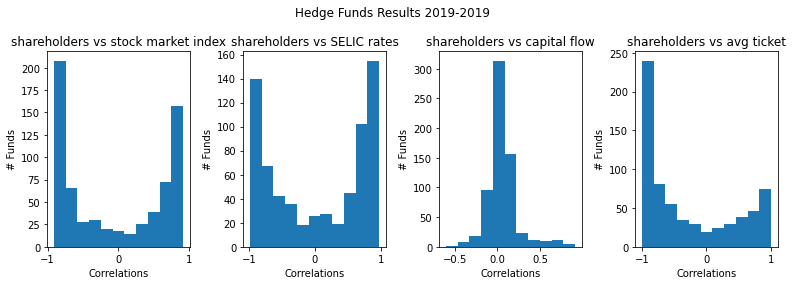

Hedge Fund Data Shape
(1537, 6)


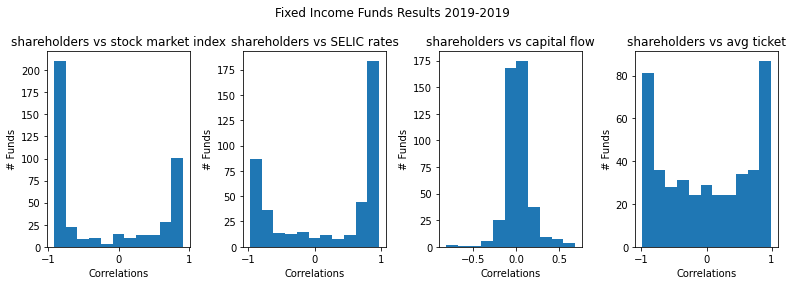

Fixed Income Rate Shape
(473, 6)


In [17]:
lowerLimit = "2019-01-01"
upperLimit = "2019-12-31"
analyze(lowerLimit, upperLimit)

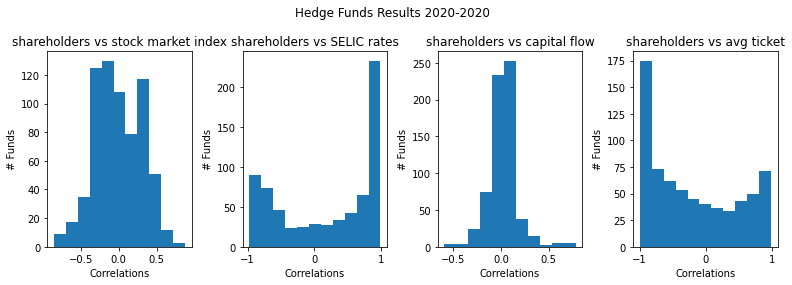

Hedge Fund Data Shape
(1537, 6)


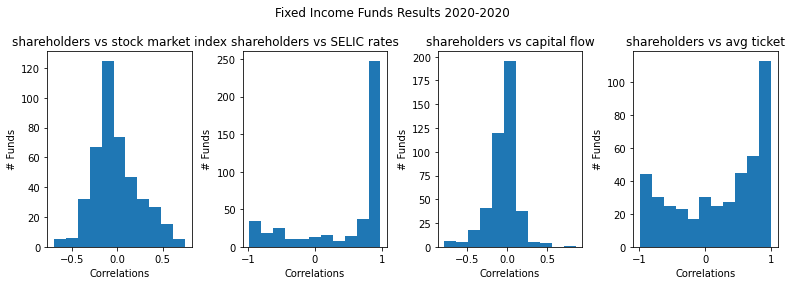

Fixed Income Rate Shape
(473, 6)


In [18]:
lowerLimit = "2020-01-01"
upperLimit = "2020-12-31"
analyze(lowerLimit, upperLimit)

In [19]:
lowerLimit = "2017-01-01"
upperLimit = "2020-12-31"
firstFundFilterLayer = mount_FirstLayer(lowerLimit,upperLimit)
filters = mount_FinalLayers(firstFundFilterLayer)
fixedIncomeFundFilterLayer = filters[0]
hedgeFundLayer = filters[1]



<AxesSubplot:xlabel='Date'>

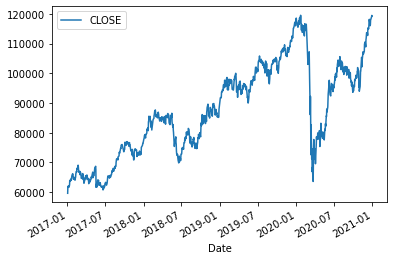

In [20]:
ibovHistoricClose.plot()

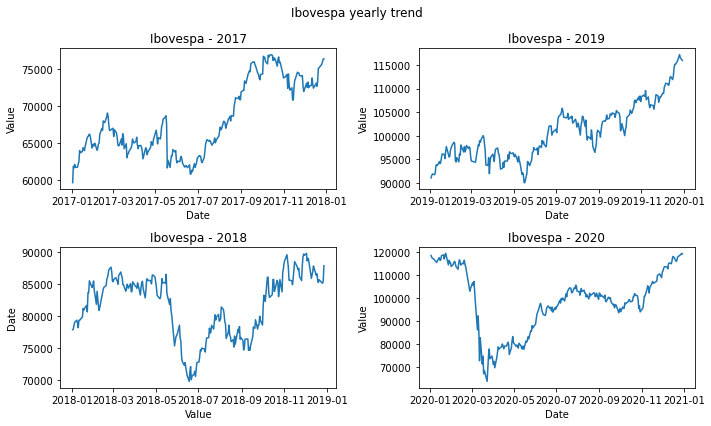

In [21]:

ibovHistoric2017 = ibov.history(start="2016-12-31",end="2018-1-1")
ibovHistoric2018 = ibov.history(start="2017-12-31",end="2019-1-1")
ibovHistoric2019 = ibov.history(start="2018-12-31",end="2020-1-1")
ibovHistoric2020 = ibov.history(start="2019-12-31",end="2021-1-1")

ibovHistoric2017 = ibovHistoric2017[["Close"]] 
ibovHistoric2018 = ibovHistoric2018[["Close"]] 
ibovHistoric2019 = ibovHistoric2019[["Close"]] 
ibovHistoric2020 = ibovHistoric2020[["Close"]] 

fig, axs = plt.subplots(2, 2, sharex=False, sharey=False)
fig.set_size_inches(10,6)
plt.suptitle("Ibovespa yearly trend")

axs[0][0].plot(ibovHistoric2017)
axs[0][0].set_title("Ibovespa - 2017")
axs[0][0].set_xlabel("Date")
axs[0][0].set_ylabel("Value")  


axs[1][0].plot(ibovHistoric2018)
axs[1][0].set_title("Ibovespa - 2018")
axs[1][0].set_xlabel("Value")
axs[1][0].set_ylabel("Date")  

axs[0][1].plot(ibovHistoric2019)
axs[0][1].set_title("Ibovespa - 2019")
axs[0][1].set_xlabel("Date")
axs[0][1].set_ylabel("Value")  

axs[1][1].plot(ibovHistoric2020)
axs[1][1].set_title("Ibovespa - 2020")
axs[1][1].set_xlabel("Date")
axs[1][1].set_ylabel("Value")      

plt.tight_layout() 
plt.show()

In [22]:
selicData

,valor
data,
2016-12-30,13.649989
2017-01-02,13.649989
2017-01-03,13.649989
2017-01-04,13.649989
2017-01-05,13.649989
...,...
2020-12-24,1.899941
2020-12-28,1.899941
2020-12-29,1.899941


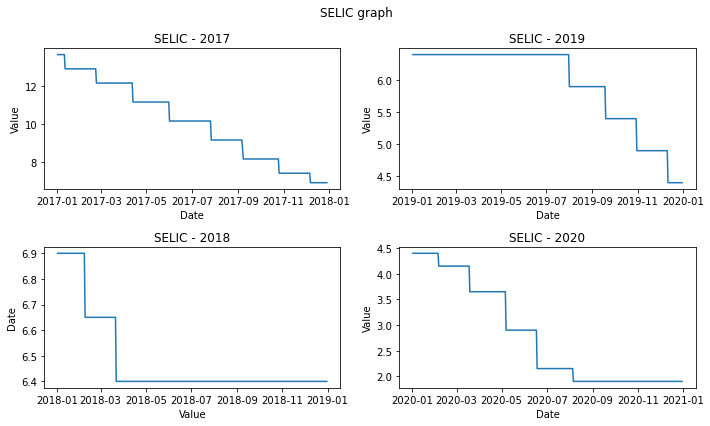

In [23]:


selicData = selicData.reset_index()
selicData2017 = selicData[((selicData["data"]>'2016-12-31') & (selicData["data"]<'2018-01-01'))].sort_values("data") 
selicData2018 = selicData[((selicData["data"]>'2017-12-31') & (selicData["data"]<'2019-01-01'))].sort_values("data") 
selicData2019 = selicData[((selicData["data"]>'2018-12-31') & (selicData["data"]<'2020-01-01'))].sort_values("data") 
selicData2020 = selicData[((selicData["data"]>'2019-12-31') & (selicData["data"]<'2021-01-01'))].sort_values("data") 

selicData2017=selicData2017.set_index('data')
selicData2018=selicData2018.set_index('data')
selicData2019=selicData2019.set_index('data')
selicData2020=selicData2020.set_index('data')


 

fig, axs = plt.subplots(2, 2, sharex=False, sharey=False)
fig.set_size_inches(10,6)
plt.suptitle("SELIC graph")

axs[0][0].plot(selicData2017)
axs[0][0].set_title("SELIC - 2017")
axs[0][0].set_xlabel("Date")
axs[0][0].set_ylabel("Value")  


axs[1][0].plot(selicData2018)
axs[1][0].set_title("SELIC - 2018")
axs[1][0].set_xlabel("Value")
axs[1][0].set_ylabel("Date")  

axs[0][1].plot(selicData2019)
axs[0][1].set_title("SELIC - 2019")
axs[0][1].set_xlabel("Date")
axs[0][1].set_ylabel("Value")  

axs[1][1].plot(selicData2020)
axs[1][1].set_title("SELIC - 2020")
axs[1][1].set_xlabel("Date")
axs[1][1].set_ylabel("Value")      

plt.tight_layout() 
plt.show()

,VL_TOTAL,VL_QUOTA,VL_PATRIM_LIQ,CAPTC_DIA,RESG_DIA,NR_COTST,CAP_LIQ,TKT_MED
count,1.539843e+07,1.539843e+07,1.539843e+07,1.539843e+07,1.539843e+07,1.539843e+07,1.539843e+07,1.534718e+07
mean,4.509613e+08,1.502239e+04,4.491871e+08,2.829099e+06,2.752343e+06,1.059561e+03,7.675540e+04,NaN
std,3.028144e+09,2.302718e+07,3.008135e+09,7.038041e+07,6.968411e+07,2.113526e+04,5.204656e+07,NaN
min,-8.804822e+08,-3.259389e+07,-8.833179e+07,0.000000e+00,0.000000e+00,0.000000e+00,-3.441170e+10,-inf
25%,1.678671e+07,1.390819e+00,1.678042e+07,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,2.798165e+06
50%,4.723933e+07,2.874078e+00,4.717449e+07,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,1.507260e+07
75%,1.713284e+08,2.861168e+01,1.708142e+08,0.000000e+00,0.000000e+00,1.300000e+01,0.000000e+00,5.741908e+07
max,3.439999e+12,9.033537e+10,3.439999e+12,4.281956e+10,4.230832e+10,5.300000e+07,3.585429e+10,inf
